In [2]:

#import data and packages
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
from functions import *
from gis_functions import *


oebo=geopandas.read_file('standard/oebo.geojson')
noe=geopandas.read_file('final/noe.geojson')  #change to standard directory next time 



In [6]:
unify=pd.concat([oebo,noe])

<AxesSubplot:>

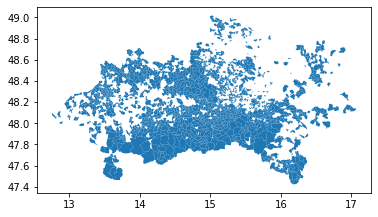

In [8]:
unify.plot()

In [16]:
#prepare basemaps
basemap=geopandas.read_file('DATA/shp_new/Oesterreich_BEV_VGD_LAM.shp')
basemap.KG_NR=basemap.KG_NR.astype(int)
basemap.to_crs(epsg=4326,inplace=True)

#isolate BL
oebo_base =basemap[basemap.BL.isin(['Oberösterreich','Niederösterreich']) ] # each BL needs own boundary. for BL in list isolate

#unify polygons
BL=oebo_base.geometry.unary_union
BL=geopandas.GeoDataFrame(geometry=[BL], crs=oebo_base.crs)


334     Annotation(15.2989, 48.1609, 'Ritzengrub')
568          Annotation(14.4785, 47.9431, 'Lausa')
478    Annotation(15.3214, 47.9807, 'Frankenfels')
697        Annotation(14.8119, 47.9803, 'Windhag')
198        Annotation(14.4183, 47.7395, 'Rosenau')
dtype: object

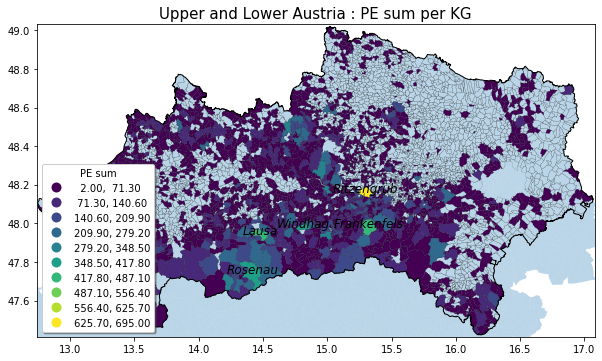

In [17]:
#plot for PE
fig,ax=plt.subplots(1,figsize=(10,15))
basemap.plot(ax=ax, alpha=0.3)
ax.set_title('Upper and Lower Austria : PE sum per KG', fontsize=15)
unify.plot(column='sum_PE', ax=ax,legend=True,scheme='equal_interval', k=10, legend_kwds={'loc':'lower left', 'shadow':'True','title':'PE sum'})

#plot KG boundaries
oebo_base.geometry.boundary.plot(edgecolor='k', linewidth=0.1, ax=ax)

#print BL boundary
BL.exterior.plot(edgecolor='k', linewidth=1, ax=ax)

#get tot extent of data and zoom in to figure
minx, miny, maxx, maxy=oebo_base.total_bounds
ax.set_xlim(minx-0.01,maxx+0.01)
ax.set_ylim(miny-0.01,maxy+0.01)

#only label first 5 bezirke 
unify.sort_values('sum_PE', inplace=True, ascending=False)
unify.head().apply(lambda x: ax.annotate(text=x.KG, xy=x.geometry.centroid.coords[0], ha='center',fontsize='large', fontstyle='oblique', color='black'), axis=1)
